# Рынок объектов общественного питания¶

# Синопсис проекта

Для привлечения инвестиций в открытие небольшого кафе в Москве, необходимо провести анализ рынка объектов общественного питания в городе Москве на основании открытых данных и подготовить для инвесторов презентацию, которая позволит привлечь инвестиции.

# План проекта
- 1 этап. Изучение и обработка имеющихся данных
- 2 этап. Анализ имеющихся данных
- 3 этап. Подготовка презентации

In [11]:
# Блок с используемыми в рамках проекта библиотеками

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.float_format', '{:,.2f}'.format)

## этап. Изучение и обработка имеющихся данных

### Просмотр данных

In [12]:
rest_date = pd.read_csv(r'C:\Users\Balak\OneDrive\Рабочий стол\Python\для GitHub\8. Общепит\rest_data.csv')

In [13]:
# Напишем функцию для просмотра датасета и удаления явных дубликатов

def view(data):
    return (
           display(data.head()),
           display(data.info()),
           display(data.describe()),
           data.drop_duplicates()           
    )

In [14]:
view(rest_date)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,number
count,"15,366.00","15,366.00"
mean,"119,720.07",59.55
std,"73,036.13",74.74
min,838.00,0.00
25%,"28,524.00",12.00
50%,"144,974.50",40.00
75%,"184,262.25",80.00
max,"223,439.00","1,700.00"


(None,
 None,
 None,
            id             object_name chain object_type  \
 0      151635                 СМЕТАНА   нет        кафе   
 1       77874                  Родник   нет        кафе   
 2       24309         Кафе «Академия»   нет        кафе   
 3       21894              ПИЦЦЕТОРИЯ    да        кафе   
 4      119365  Кафе «Вишневая метель»   нет        кафе   
 ...       ...                     ...   ...         ...   
 15361  208537             Шоколадница    да        кафе   
 15362  209264             Шоколадница    да        кафе   
 15363  209186             Шоколадница    да        кафе   
 15364  221900             Шоколадница    да        кафе   
 15365  222535             Шоколадница    да        кафе   
 
                                                  address  number  
 0             город Москва, улица Егора Абакумова, дом 9      48  
 1      город Москва, улица Талалихина, дом 2/1, корпус 1      35  
 2              город Москва, Абельмановская улица, д

Вопросы, которые возникают при просмотре датасета:
- данные с наименованиями объектов питания указаны в разных регистрах и по разным шаблонам, необходимо проанализировать можно ли с этим что то сделать
- необходимо проверить действительно ли все кафе с отметкой о том, что они сетевые или несетевые являются такими
- в данных о количестве посадочных мест встречаются 0, в принципе такое возможно в заведениях, где работают только на вынос, но необходимо посмотреть данные по таким объектам
- типы данных в датасете соответствуют той информации, которая содержится в столбцах
- явные дубликаты отсутствуют

### Столбец `id`

In [15]:
len(rest_date['id'].unique())

15366

**Вывод** Данные в столбце являются уникальными, но это может также говорить о возможном задвоении сведений об объектах, когда одному и тому же объекту могли быть присвоены разные идентификаторы.

### Столбец `object_name`

In [16]:
rest_date['object_name'].head()

0                   СМЕТАНА
1                    Родник
2           Кафе «Академия»
3                ПИЦЦЕТОРИЯ
4    Кафе «Вишневая метель»
Name: object_name, dtype: object

In [17]:
rest_date['object_name'].tail()

15361    Шоколадница
15362    Шоколадница
15363    Шоколадница
15364    Шоколадница
15365    Шоколадница
Name: object_name, dtype: object

**Подвывод** данные о наименовании объектов имеют проблему корректного учета названий, когда объекты относящиеся к одной сети записаны в датасете по разному.

In [18]:
len(rest_date['object_name'].unique())

10393

**Подвывод** уникальных значений по наименованиям объектов в датасете меньше, но возможно мы видим их больше, чем на самом деле есть, поскольку в написании объектов может быть использован разный регистр записи.

In [19]:
rest_date['object_name'] = rest_date['object_name'].str.lower()

In [20]:
len(rest_date['object_name'].unique())

9924

**Подвывод** действительно, приведение наименований объектов к строчному написанию уменьшил уникальное количество записей.

In [21]:
# Посчитаем количество дубликатов, без учета столбца `id`
len(rest_date)-len(rest_date.drop_duplicates(subset = ['object_name', 'chain', 'object_type', 'address', 'number']))

85

In [22]:
rest_date = rest_date.drop_duplicates(subset = ['object_name', 'chain', 'object_type', 'address', 'number'])

In [23]:
rest_date['number'] = rest_date['number'].astype(int)

In [24]:
rest_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 776.0+ KB


**Выводы и итоги по разделу:** Обнаружили необходимость детальной инвентаризации в системе учета объектов, поскольку объекты отнесенные к одной сети учитываются под разными наименованиями, что приводит к искажению общей картины. К сожалению, доступными способами эту корректировку в рамках настоящего проекта осуществить не удастся, поэтому я считаю, что можно ограничится к приведению наименования объектов к строчному написанию и удалением дубликатов, чтобы устранить задвоение некоторых объектов в датасете.

### Столбец `chain`

In [25]:
rest_date[rest_date['chain'] == 'да']['object_name'].value_counts().head(100)

шоколадница                  157
kfc                          155
макдоналдс                   150
бургер кинг                  137
теремок                       94
                            ... 
ресторан «иль патио»           5
пиццерия «домино'с пицца»      5
магбургер                      5
пицца фабрика                  5
moskalyan                      5
Name: object_name, Length: 100, dtype: int64

In [26]:
rest_date[rest_date['chain'] == 'да']['object_name'].value_counts().tail(100)

предприятие быстрого обслуживания «крошка картошка»    1
спб                                                    1
бир хаус                                               1
кафе чайхона №1                                        1
кафе «марукамэ»                                        1
                                                      ..
кафе «кофейня старбакс»                                1
кафе «меленка»                                         1
ресторан «джардино да пино»                            1
кафе «менза»                                           1
мята                                                   1
Name: object_name, Length: 100, dtype: int64

**Вывод** В целом данныей столбец только подтверждает выявленный ранее момент с некоректным учетом в датасете объектов относящихся к одной сети.

### Столбец `object_type`

In [27]:
rest_date['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

**Вывод** В представленном датасете есть 9 типов объектов, каких то особых недостатков не наблюдается.

### Столбец `address`

In [28]:
rest_date['address'].value_counts().head(10)

город Москва, Ходынский бульвар, дом 4            95
город Москва, Пресненская набережная, дом 2       63
город Москва, проспект Мира, дом 211, корпус 2    60
город Москва, Кировоградская улица, дом 13А       52
город Москва, площадь Киевского Вокзала, дом 2    47
город Москва, Мытная улица, дом 74                46
город Москва, улица Земляной Вал, дом 33          46
город Москва, улица Новый Арбат, дом 21           42
город Москва, улица Ленинская Слобода, дом 26     41
город Москва, Кутузовский проспект, дом 57        40
Name: address, dtype: int64

In [29]:
rest_date[rest_date['address'] == 'город Москва, Ходынский бульвар, дом 4'].head()

,id,object_name,chain,object_type,address,number
11800,94102,barbecue bbq storege,нет,предприятие быстрого обслуживания,"город Москва, Ходынский бульвар, дом 4",20
11801,94433,chaikhana shurpa,нет,предприятие быстрого обслуживания,"город Москва, Ходынский бульвар, дом 4",50
11802,94667,хмели-сунели,нет,ресторан,"город Москва, Ходынский бульвар, дом 4",100
11803,96595,панчо пицца,да,ресторан,"город Москва, Ходынский бульвар, дом 4",23
11804,96598,new york pizza,нет,кафе,"город Москва, Ходынский бульвар, дом 4",0


**Выводы** аномально высокое количество заведений, помимо ситуации с неймингом описанной выше наталкивает также на мысль, что учет данных может вестись без корректировки на то, что какие то заведения закрываются и на их месте открываются новые. Наличие 95 объектов общепита по одному адресу конечно вероятно, если это какой то очень большой торговый центр, но все же я допускаю, что эти данные нельзя считать однозначно корректными.

### Столбец `number`

In [30]:
rest_date['number'].sort_values()

11804       0
14253       0
1148        0
14254       0
9209        0
         ... 
4480     1200
9064     1288
8345     1400
8148     1500
12723    1700
Name: number, Length: 15281, dtype: int32

In [31]:
rest_date[rest_date['number'] == 0]['object_type'].value_counts()

предприятие быстрого обслуживания    690
кафе                                 306
закусочная                           181
магазин (отдел кулинарии)            145
кафетерий                            111
буфет                                 64
ресторан                              44
бар                                   28
столовая                              19
Name: object_type, dtype: int64

In [32]:
rest_date[(rest_date['object_type'] == 'бар') & (rest_date['number'] == 0)].head()

,id,object_name,chain,object_type,address,number
1802,106196,бар «попкорн»,нет,бар,"город Москва, микрорайон Северное Чертаново, д...",0
2510,155560,японский пес,нет,бар,"город Москва, улица Академика Янгеля, дом 6, к...",0
6116,20410,сердолик-ю,нет,бар,"город Москва, Профсоюзная улица, дом 61А",0
7569,107408,бар «консешн бар»,нет,бар,"город Москва, Днепропетровская улица, дом 2",0
7859,77595,бильярдная сова,нет,бар,"город Москва, Марксистская улица, дом 34, корп...",0


**Выводы по разделу** Данные обнаруживают еще одну особенноть, что не по всем объектам данные в столбце с количеством посадочных мест можно считать корректным, поскольку представить ресторан или бар с нулевым количеством посадочных мест сложно, при этом на мой взгляд отсутствует корректный способ заменить эти данные, без проведения полноценной инвентаризации невозможно, поэтому в дальнейшем при проведении проекта мы должны учитывать и этот момент.

**Сводные выводы по этапу:**
- В рамках данного шага был детально изучен датасет, удалены дубликаты, которые можно было удалить и данные приведены к необходимому типу.
- Выявлено, что в данных имеются проблемы с унификацией учета сетевых объектов, вероятно не учитывается, что некоторые из объектов уже не работают и некорректно учтено количество посадочных мест по некоторым объектам.

## этап. Анализ данных

### Соотношение объектов по типу

In [33]:
object_type = (rest_date.pivot_table(index='object_type', values='id', aggfunc='count')
                       .reset_index(drop=False)
                       .sort_values(by='id', ascending=False)
                       .reset_index(drop=True))

In [34]:
object_type['share'] = (object_type['id'] / sum(object_type['id'])*100).round(1)

In [35]:
object_type

,object_type,id,share
0,кафе,6071,39.70
1,столовая,2584,16.90
2,ресторан,2282,14.90
3,предприятие быстрого обслуживания,1897,12.40
4,бар,855,5.60
5,буфет,576,3.80
6,кафетерий,395,2.60
7,закусочная,348,2.30
8,магазин (отдел кулинарии),273,1.80


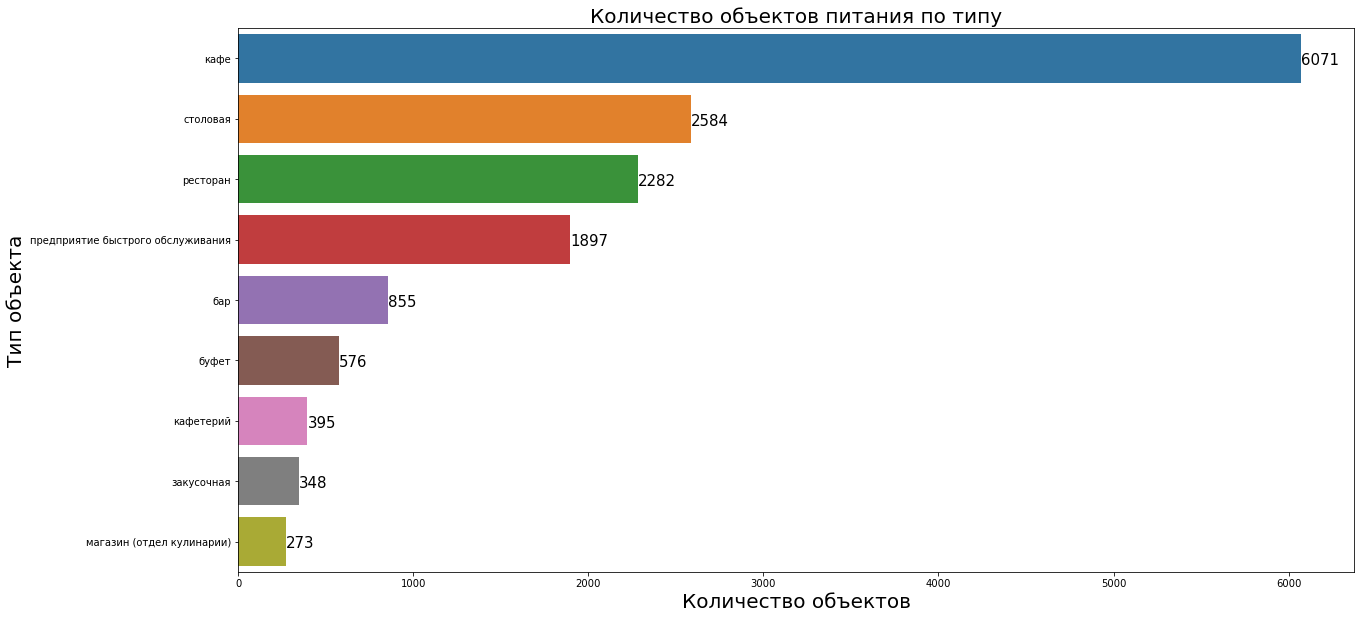

In [36]:
fig, axes = plt.subplots()
ax = sns.barplot(data=object_type, y='object_type', x='id')
ax.set_xlabel('Количество объектов', fontsize = '20')
ax.set_ylabel('Тип объекта', fontsize = '20')
ax.set_title('Количество объектов питания по типу', fontsize = '20')

for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.5,
             str(round((i.get_width()))),
             fontsize = 15, 
             color ='black')
    
fig.set_figwidth(20)    
fig.set_figheight(10)  

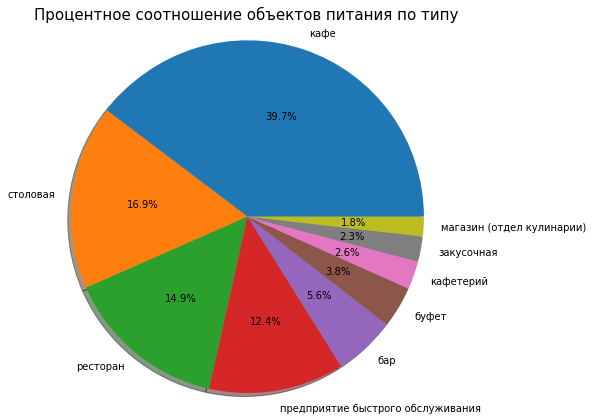

In [37]:
fig, ax = plt.subplots()

ax.pie(object_type['share'], labels=object_type['object_type'], autopct='%1.1f%%',
        shadow=True)
ax.axis('equal')  
fig.set_size_inches(7,7)
ax.set_title('Процентное соотношение объектов питания по типу', fontsize = '15')
plt.show()

**Вывод** наиболее популярный типом заведения в Москве является кафе, доля которых составляет правктически 40% от общего числа объектов питания. Также достаточно много столовых, ресторанов и предприятий быстрого питания, доля которых составляет от 12 до 17 процентов по каждому типу.

### Соотношение сетевых и несетевых объектов

In [38]:
chain = (rest_date.pivot_table(index='chain', values='id', aggfunc='count')
                       .reset_index(drop=False)
                       .sort_values(by='id', ascending=False)
                       .reset_index(drop=True)
                       .replace({'нет' : 'несетевые', 'да' : 'сетевые'}))

In [39]:
chain['share'] = (chain['id'] / sum(chain['id'])*100).round(1)

In [40]:
rest_date[rest_date['chain'] == 'да']['id'].count()

2964

In [41]:
chain

,chain,id,share
0,несетевые,12317,80.60
1,сетевые,2964,19.40


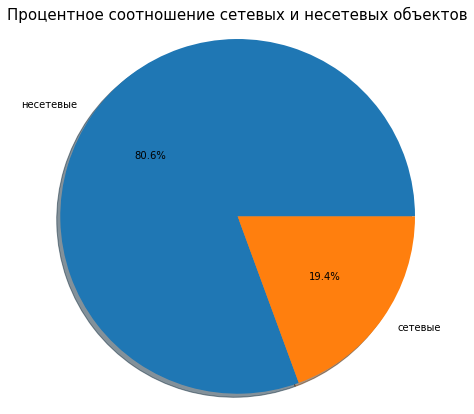

In [42]:
fig, ax = plt.subplots()

ax.pie(chain['share'], labels=chain['chain'], autopct='%1.1f%%',
        shadow=True)
ax.axis('equal')  
fig.set_size_inches(7,7)
ax.set_title('Процентное соотношение сетевых и несетевых объектов', fontsize = '15')
plt.show()

**Вывод** Доля сетевых заведений составляет 19,4% от общего числа объектов.

### Типы объекты, для которых характерно сетевое распределение

In [43]:
share_chain = (rest_date.pivot_table(index=['object_type', 'chain'], values='id', aggfunc='count')
          .unstack()
          .reset_index(drop=False))
share_chain.columns = ['Тип заведения', 'Количество сетевых', 'Количество несетевых']
share_chain['Доля сетевых заведений'] =  (share_chain['Количество сетевых']/(share_chain['Количество несетевых'] + share_chain['Количество сетевых']) *100).round(1)  
share_chain = share_chain.sort_values(by='Доля сетевых заведений', ascending=False).reset_index(drop=True)


In [44]:
share_chain

,Тип заведения,Количество сетевых,Количество несетевых,Доля сетевых заведений
0,предприятие быстрого обслуживания,788,1109,41.50
1,магазин (отдел кулинарии),78,195,28.60
2,ресторан,543,1739,23.80
3,кафе,1396,4675,23.00
4,закусочная,56,292,16.10
5,кафетерий,52,343,13.20
6,бар,37,818,4.30
7,буфет,11,565,1.90
8,столовая,3,2581,0.10


In [45]:
(rest_date.query('chain == "да"')
          .pivot_table(index=['object_type', 'chain'], values='id', aggfunc='count')
          .reset_index(drop=False)
          .sort_values(by=['chain', 'id'], ascending=False)
          .reset_index(drop=True)
          .replace({'нет' : 'несетевые', 'да' : 'сетевые'}))

,object_type,chain,id
0,кафе,сетевые,1396
1,предприятие быстрого обслуживания,сетевые,788
2,ресторан,сетевые,543
3,магазин (отдел кулинарии),сетевые,78
4,закусочная,сетевые,56
5,кафетерий,сетевые,52
6,бар,сетевые,37
7,буфет,сетевые,11
8,столовая,сетевые,3


**Выводы** Ожидаемо, что наибольшее число сетевых заведений составляют кафе, предприятия быстрого обслуживания и рестораны. При этом, если рассматривать соотношения сетевых и несетевых заведений в рамках одного типа, то наибольшее преимущество сетевая форма распространения имеет среди предприятий быстрого обслуживания (41%), магазины (отделы кулинарии) (28,6%), а также рестораны и кафе, среди которых доля сетевых заведений составляет 23,8% и 23% соответствнно

### Тренды в сетевых заведениях по количеству заведений и посадочных мест

In [46]:
# Поскольку ранее мы выявили особенность некорректного написания сетевых заведений, 
# учтем это при формировании сводной таблицы, удалив из таблицы те заведения, которые состоят из 1 объекта,
# поскольку 1 заведение нехарактерно для сетевого распределения.


chain_trad = (rest_date.query('(chain == "да")')
                        .pivot_table(index='object_name', values='number', aggfunc=['count', 'mean'])
                        .reset_index(drop=False))
chain_trad.columns = ['Название сети', 'Количество заведений', 'Среднее количество мест']
chain_trad['Среднее количество мест'] = chain_trad['Среднее количество мест'].astype(int)
chain_trad = chain_trad[chain_trad['Количество заведений'] > 1].sort_values(by=['Количество заведений', 'Среднее количество мест'], ascending=False).reset_index(drop=True)


In [47]:
chain_trad.describe(percentiles=[.75, .90, .95])

,Количество заведений,Среднее количество мест
count,246.00,246.00
mean,10.70,59.10
std,22.64,49.56
min,2.00,0.00
50%,4.00,44.00
75%,7.00,85.00
90%,22.50,123.50
95%,41.75,151.75
max,157.00,258.00


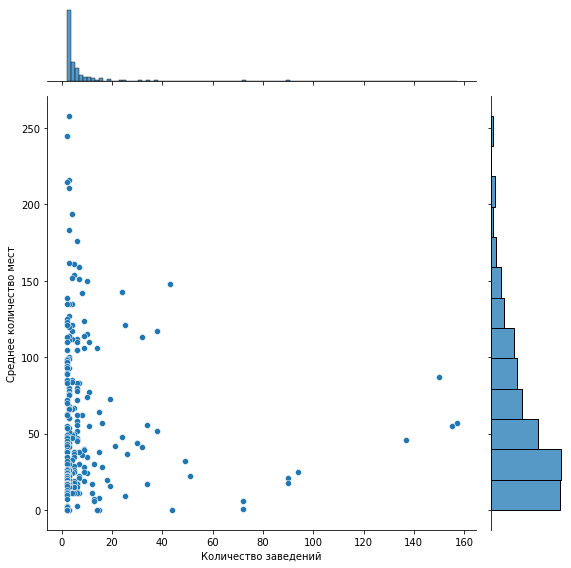

In [48]:
sns.jointplot(x='Количество заведений', 
              y='Среднее количество мест', 
              data=chain_trad, #Скорректируем данные, с учетом того, что в датасете часто встречаются ошибочное написание названия сети
              height=8) 

plt.show()

**Выводы** Для сетевого распределения характерно небольшое количество заведений (от 4 до 7) с количеством посадочных мест от 40 до 80.

### Среднее количество посадочных мест

In [49]:
number_chain = (rest_date.pivot_table(index='object_type', values='number', aggfunc='mean')
                        .reset_index() 
                        .sort_values(by='number', ascending=False)
                        .reset_index(drop=True)
                        )
number_chain['number'] = number_chain['number'].astype(int)


In [50]:
number_chain

,object_type,number
0,столовая,130
1,ресторан,96
2,буфет,51
3,бар,43
4,кафе,39
5,предприятие быстрого обслуживания,20
6,кафетерий,9
7,закусочная,7
8,магазин (отдел кулинарии),5


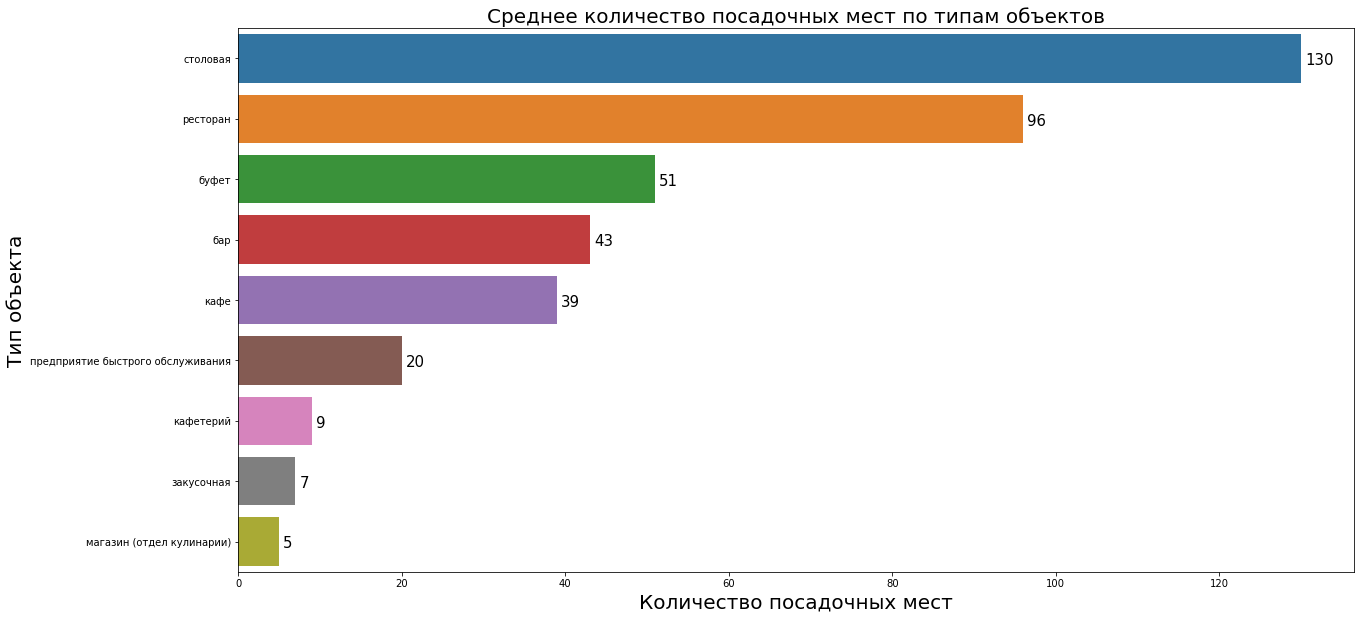

In [51]:
fig, axes = plt.subplots()
ax = sns.barplot(data=number_chain, y='object_type', x='number')
ax.set_xlabel('Количество посадочных мест', fontsize = '20')
ax.set_ylabel('Тип объекта', fontsize = '20')
ax.set_title('Среднее количество посадочных мест по типам объектов', fontsize = '20')

for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.5,
             str(round((i.get_width()))),
             fontsize = 15, 
             color ='black')
    
fig.set_figwidth(20)    
fig.set_figheight(10)  

**Вывод** Лидерами по среднему показателю количества посадочных мест являются столовые (130), рестораны (96) и буфеты (51)

### Улицы, на которых находятся объекты

In [52]:
#Создадим столбец улицы, скопировав его из столбца адрес и очистив эти данные от информации не связанной с улицей

rest_date['street'] = rest_date['address']

rest_date['street'] = (rest_date['street']
                       .str
                       .replace(r'город Москва, ',''))
 

(rest_date.loc[rest_date['street']
         .str.contains('город '), 'street']) = (rest_date.loc[rest_date['street']
                                                        .str
                                                        .contains('город '), 'street']
                                                        .str.split(', ')
                                                        .str[1])
 

(rest_date.loc[(rest_date['street']
        .str
        .contains('посёлок')) & 
        (rest_date['street']
        .str.contains('поселение')), 'street']) = (
                                                  rest_date.loc[(rest_date['street']
                                                  .str
                                                  .contains('посёлок')) & 
                                                  (rest_date['street']
                                                  .str.contains('поселение')), 'street']
                                                  .str
                                                  .split(', ')
                                                  .str[2]
)

(rest_date.loc[rest_date['street']
         .str
         .contains('поселение|посёлок'), 'street']) = (
                                                       rest_date
                                                       .loc[rest_date['street']
                                                       .str
                                                       .contains('поселение|посёлок'), 'street']
                                                       .str
                                                       .split(', ')
                                                       .str[1]
) 

rest_date['street'] = rest_date['street'].str.split(', ').str[0]

In [74]:
rest_date.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


**Вывод** Был создан столбец с улицами

### Топ 10 улиц, на которых находится больше всего объектов

In [54]:
top_street = (rest_date.pivot_table(index='street', values='id', aggfunc='count')
                      .reset_index() 
                      .sort_values(by='id', ascending=False)
                      .reset_index(drop=True)
                      .head(10))

In [55]:
top_street

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


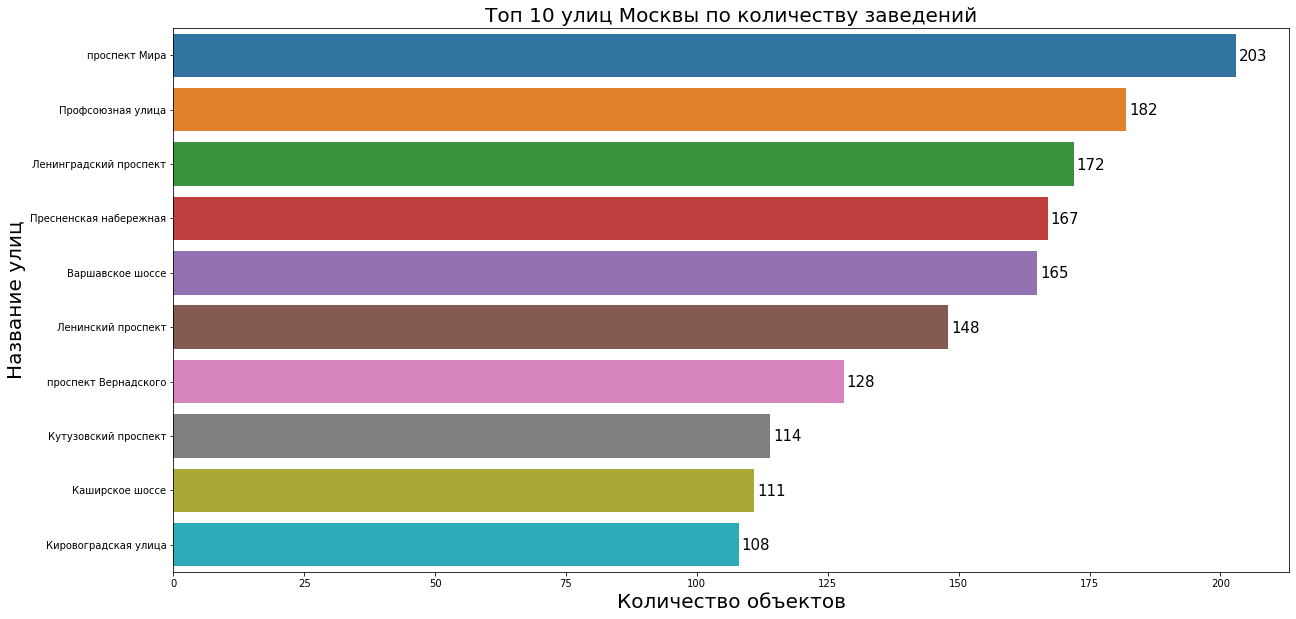

In [56]:
fig, axes = plt.subplots()
ax = sns.barplot(data=top_street, y='street', x='id')
ax.set_xlabel('Количество объектов', fontsize = '20')
ax.set_ylabel('Название улиц', fontsize = '20')
ax.set_title('Топ 10 улиц Москвы по количеству заведений', fontsize = '20')

for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.5,
             str(round((i.get_width()))),
             fontsize = 15, 
             color ='black')
    
fig.set_figwidth(20)    
fig.set_figheight(10)  

In [73]:
from io import BytesIO
import requests
spreadsheet_id = '17kKYCMYXOew5ZeXr6CeIv0uQZIjadtXgDIvt8L-y0c8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
disrict_msk = pd.read_csv(BytesIO(r.content))
disrict_msk
disrict_msk = disrict_msk.drop(columns=['Unnamed: 4', 'areaid', 'okrug'])
disrict_msk.columns = ['street', 'area']
disrict_msk.head()

,street,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район


In [58]:
top_street_district = top_street.merge(disrict_msk, on='street', how='left')

In [59]:
top_street_district.head()

,street,id,area
0,проспект Мира,203,Алексеевский район
1,проспект Мира,203,Ярославский Район
2,проспект Мира,203,Район Марьина роща
3,проспект Мира,203,Останкинский район
4,проспект Мира,203,Район Ростокино


**Выводы** В разделе был определен топ 10 улиц Москвы по количеству объектов, а также определены районы Москвы, по которым проходят эти улицы.

### Улицы, на которых находится меньше всего объектов

In [60]:
min_object_street = (rest_date.pivot_table(index='street', values='id', aggfunc='count')
                      .reset_index() 
                      .sort_values(by='id')
                      .reset_index(drop=True)
                      .query('id == 1'))

In [72]:
min_object_street.head()

,street,id
0,улица Кошкина,1
1,Таганрогская улица,1
2,улица Академика Павлова,1
3,улица Академика Петровского,1
4,Сумская улица,1


In [62]:
# Учтем, что у нас могут быть улицы, которые не учтены в административно-территориальном делении Москвы.
min_object_street_district = min_object_street.merge(disrict_msk, on='street', how='left').dropna().reset_index(drop=True)

In [71]:
min_object_street_district.head()

,street,id,area
0,улица Кошкина,1,Район Москворечье-Сабурово
1,Таганрогская улица,1,Район Люблино
2,улица Академика Павлова,1,Район Кунцево
3,улица Академика Петровского,1,Донской район
4,улица Академика Петровского,1,Район Якиманка


**Выводы** В разделе был определен перечень улиц с всего одним объектом, а также районы города Москвы, где проходят эти улицы

In [70]:
min_object_street_district_1 = min_object_street.merge(disrict_msk, on='street', how='left')
min_object_street_district_1[min_object_street_district_1['area'].isna()].head()

,street,id,area
67,улица Недорубова,1,NaN
93,улица Никитина,1,NaN
117,село Былово,1,NaN
127,село Остафьево,1,NaN
146,проектируемый проезд № 1980,1,NaN


### Распределение посадочных мест на топ улицах

In [65]:
top_street_list = list(top_street['street'])

In [69]:
rest_date.query('street in @top_street_list').head()

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


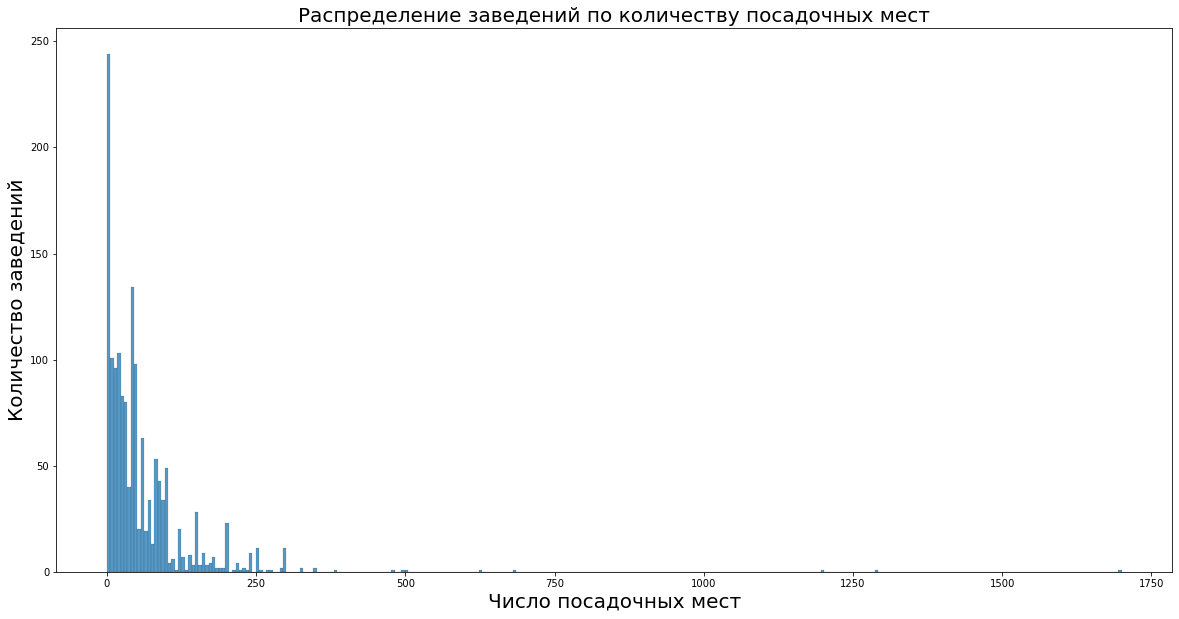

In [67]:
fig, axes = plt.subplots()
ax = sns.histplot(rest_date.query('street in @top_street_list')['number'], bins=300)
ax.set_xlabel('Число посадочных мест', fontsize = '20')
ax.set_ylabel('Количество заведений', fontsize = '20')
ax.set_title('Распределение заведений по количеству посадочных мест', fontsize = '20')    
fig.set_figwidth(20)    
fig.set_figheight(10)  

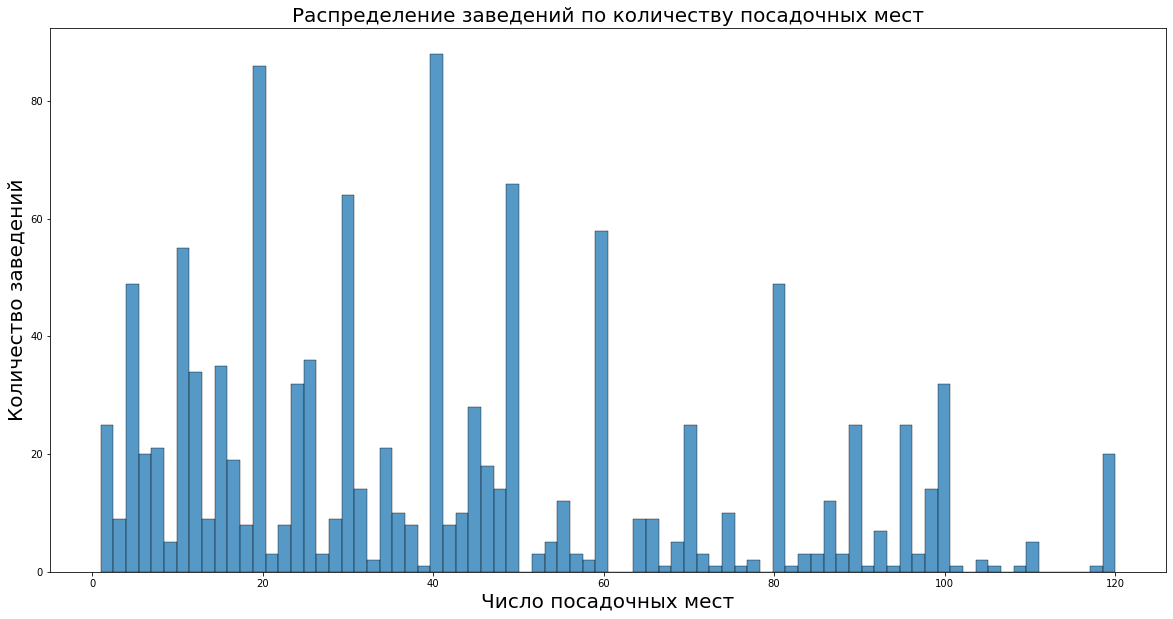

In [68]:
fig, axes = plt.subplots()
ax = sns.histplot(rest_date.query('(street in @top_street_list) and (number > 0) and (number < 123)')['number'], bins=80)
ax.set_xlabel('Число посадочных мест', fontsize = '20')
ax.set_ylabel('Количество заведений', fontsize = '20')
ax.set_title('Распределение заведений по количеству посадочных мест', fontsize = '20')    
fig.set_figwidth(20)    
fig.set_figheight(10)  

**Вывод** 
- В целом мы видим, что распределение заведений близко к распределение Пуассона, за счет большого количества объектов без посадочных мест, с небольшими промежуточными всплесками, что говорит о том, что мы имеем обратно пропорциональную зависимость между количеством заведений и посадочных мест в них.
- Если рассматривать заведения с количеством посадочных мест более 0 и менее 123 (ранее мы установили, что это значение среднего количества посадочных мест, в пределах которых находится 90% объектов датасета), то мы видимо характерные пики по количеству заведений, число посадочных мест в которых кратно 10, больше всего объектов, где 20 и 40 посадочных мест.

### Общие выводы и рекомендации по 2 этапу

#### Выводы

- Около 40% объектов общественного питания города Москвы составляют кафе.
- Доля сетевых объектов общественного питания составляет менее 20% от общего числа.
- Наиболее часто вариант сетевого распределения бизнеса выбирают владельцы предприятий быстрого питания, кулинарии в рамках крупных продовольственных магазинов, кафе и рестораны.
- Сетевое распределение бизнеса характеризует небольшое количество заведений (от 4 до 8) с количеством посадочных мест в диапазоне от 40 до 80.
- Наибольшее среднее количество посадочных мест имеют столовые (130 мест) и рестораны (91 место), для буфетов баров и кафе характерно значение в 40-50 посадочных мест
- на топ 10 улиц города Москвы находятся объекты общественного питания в количестве от 100 до 200 на каждой улице
- мы отмечаем большое количество улиц, на которых находится всего по 1 объекту общественного питания.

#### Рекомендации

Исходя только из количественных показателей (на мой взгляд финансовых показателей в данном проекте не хватает для более релевантных рекомендаций), учитывая заданный в проекте wow-factor, можно порекомендовать следующее:
- рынок Москвы перенасыщен кафе, но учитывая специфику предлагаемого концепта подразумевает то, что новое кафе необходимо открывать в наиболее оживленных районах города, на что может указывать большое количество существующих объектов.
- Количество посадочных мест не должно превышать 50, поскольку подразумевается, что целевая аудитория этого кафе будет достаточно состоятельна, поэтому открывать заведение с бОльшим количеством посадочных мест нецелесообразно.
- Возможность и целесообразность развития сети данных кафе станет понятна после определенного тестового периода пилотного проекта, стоимость создания которого достаточно велика, а экономическая эффективность неочевидна.